In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Purpose
Classify MNSIT using SVCs (SVM classifiers) and kernels. MNIST is a dataset of handwritten digits; the task is to classify the digits as 0-9. The images themselves are 28 x 28 pixels large. 

## Data Set-Up 

Import data and import train_test_split from sklearn.



In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets import fetch_openml

# fetch "MNIST original"
data = fetch_openml('mnist_784')

X = data.data.to_numpy(dtype=np.float32) 
y = data.target.to_numpy(dtype=np.int32)

print(X.shape) 
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

# The SVM algorithm runs in O(n^2) time, where n is the number of training po
# To prevent the algorithm from taking forever, take only the first 10000 dat
# from the training set and the first 2000 data points from the test set
X_train, y_train = X_train[:10000], y_train[:10000] 
X_test, y_test = X_test[:2000], y_test[:2000]

(70000, 784)
(70000,)


We will only use 1's and 7's for our classification problem. The following code block should filter out only the 1's and 7's:

In [4]:
# Making new test and train sets with only 1's and 7's

train_mask = ((y_train == 1).astype(int) + (y_train == 7).astype(int)).astype(bool)
test_mask = ((y_test == 1).astype(int) + (y_test == 7).astype(int)).astype(bool)

X_test = X_test[test_mask, :]
y_test = y_test[test_mask]
X_train = X_train[train_mask, :]
y_train = y_train[train_mask]

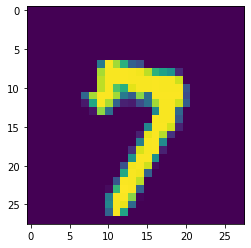

In [5]:
plt.imshow(X_train[0].reshape(28,28))
plt.show()

## Use PCA from sklearn
We will use Principal Component Analysis (PCA) to manipulate the data to make it more usable for SVC. The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set by projecting the data on to a space while still retaining as much variance in the data as possible.

In [11]:
# import PCA
from sklearn.decomposition import PCA

# There are a total of 28 * 28 features (one per pixel)
# Let's project this down to 2 features using pca (2 features so we can plot out the data in 2-d)
pca = PCA(n_components = 2)

# Use pca to transform X_train, X_test
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

# print the shape of X_train_pca 
X_train_pca.shape

(2185, 2)

## SVC and Kernels

Now, we will experiment with support vector classifiers and kernels. We will need LinearSVC, SVC, and accuracy_score.

SVMs are really interesting because they have something called the dual formulation, in which the computation is expressed as training point inner products. This means that data can be lifted into higher dimensions easily with this "kernel trick". Data that is not linearly separable in a lower dimension can be linearly separable in a higher dimension - which is why we conduct the transform. Let us experiment.

A transformation that lifts the data into a higher-dimensional space is called a kernel. A polynomial kernel expands the feature space by computing all the polynomial cross terms to a specific degree.

In [12]:
# import SVC, LinearSVC, accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# fit the LinearSVC on X_train_pca and y_train and then print train accuracy and test accuracy

lsvc = LinearSVC().fit(X_train_pca, y_train)

print('train acc: ', accuracy_score(y_train, lsvc.predict(X_train_pca)))
print('test acc: ', accuracy_score(y_test, lsvc.predict(X_test_pca)))
        
# use SVC with an RBF kernel. Fit this model on X_train_pca and y_train and print accuracy metrics as before

svc = SVC().fit(X_train_pca, y_train)
print('train acc: ', accuracy_score(y_train, svc.predict(X_train_pca))) 
print('test acc: ', accuracy_score(y_test, svc.predict(X_test_pca)))

train acc:  0.9707093821510298
test acc:  0.7679814385150812
train acc:  0.9858123569794051
test acc:  0.8167053364269141


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


## Visualize

Now, we will plot out all the data points in the test set. Ones are colored red and sevens are colored blue. The plot is a reault of using PCA on a 784 dimensional data.

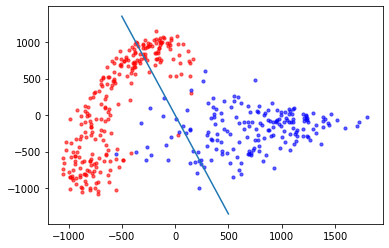

In [8]:
test_mask_ones = (y_test == 1).astype(int).astype(bool)
test_mask_sevens = (y_test == 7).astype(int).astype(bool)

X_test_ones = X_test_pca[test_mask_ones, :]

X_test_sevens = X_test_pca[test_mask_sevens, :]

plt.scatter(X_test_ones[:, 0], X_test_ones[:, 1], c = 'red', alpha=0.6, s=10)
plt.scatter(X_test_sevens[:, 0], X_test_sevens[:, 1], c = 'blue', alpha=0.6, s=10)

# Plot of decision boundary of a linear svm

weights = lsvc.coef_[0]
x = np.linspace(-500,500,100)
y = x / weights[1] * -weights[0]
plt.plot(x,y)

plt.show()

### Sort

Now we're going to do a kind of hack. We've trained a linearSVM (SVC) on a binary classification problem. But what if we wanted something more regression-like? Say we wanted to score each datapoint on how "one-y" or how "seven-y" it looked. How would we do that? Check out the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC).

In the block below, we create a list of scores for each datapoint in `X_test_pca`. Then, we sort `X_test` using the scores from `X_test_pca` (we're using `X_test` instead of `X_test_pca` because we want to plot the images). The block after contains code to plot out the sorted images. You should see 1's gradually turn in to 7's.

In [9]:
train_mask = ((y_train == 1).astype(int) + (y_train == 7).astype(int)).astype(bool)
test_mask = ((y_test == 1).astype(int) + (y_test == 7).astype(int)).astype(bool)

X_test = X_test[test_mask, :]
y_test = y_test[test_mask]
X_train = X_train[train_mask, :]
y_train = y_train[train_mask]

pca = PCA(n_components = 2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

scores = lsvc.decision_function(X_test_pca)
sorted_X = [x for _, x in sorted(zip(scores, X_test))]
# print(sorted_X)

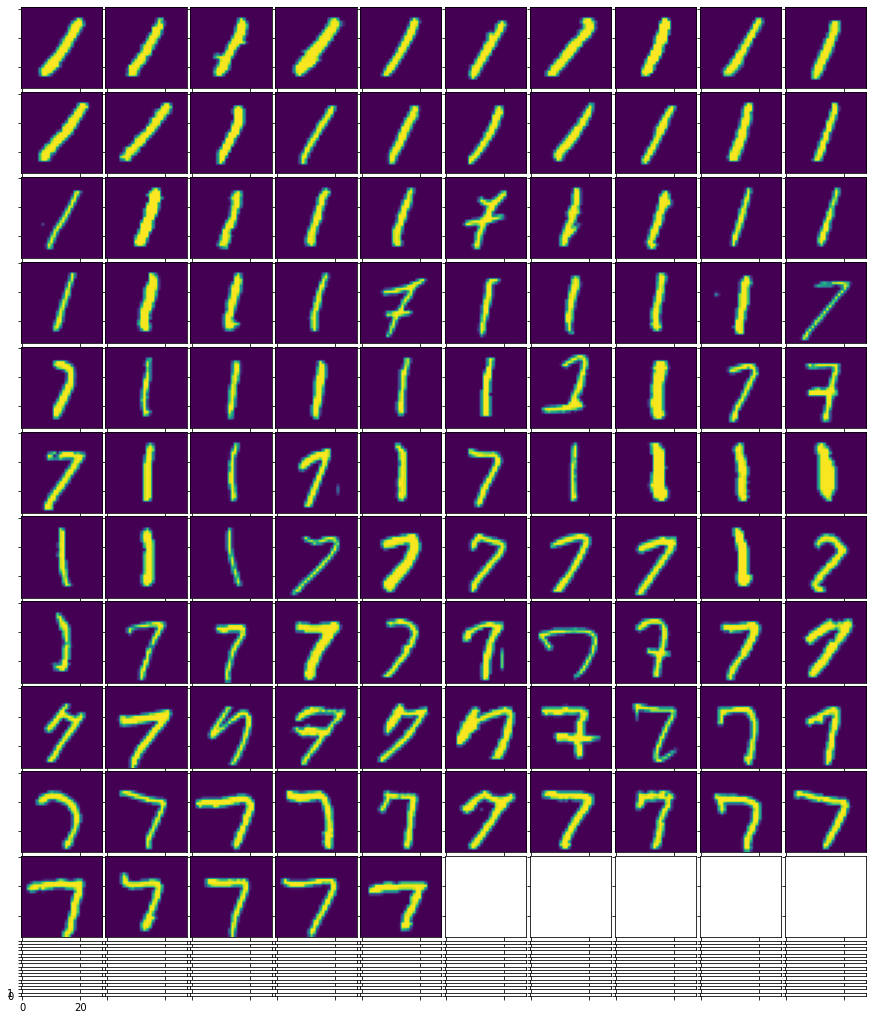

In [10]:
from mpl_toolkits.axes_grid1 import AxesGrid

def plot(x):
    plt.imshow(x.reshape(28,28))
    plt.show()

def plot_dataset(X):
    fig = plt.figure(1, (60, 60))

    fig.subplots_adjust(left=0.05, right=0.95)
    
    grid = AxesGrid(fig, 141,  # similar to subplot(141)
                    nrows_ncols=(20, 10),
                    axes_pad=0.05,
                    label_mode="1",
                    )
    
    for i in range(0, 420, 4):
        grid[i//4].imshow(X[i].reshape(28,28))


plot_dataset(sorted_X)